## Module submission header
### Submission preparation instructions 
_Completion of this header is mandatory, subject to a 2-point deduction to the assignment._ Only add plain text in the designated areas, i.e., replacing the relevant 'NA's. You must fill out all group member Names and Drexel email addresses in the below markdown list, under header __Module submission group__. It is required to fill out descriptive notes pertaining to any tutoring support received in the completion of this submission under the __Additional submission comments__ section at the bottom of the header. If no tutoring support was received, leave NA in place. You may as well list other optional comments pertaining to the submission at bottom. _Any distruption of this header's formatting will make your group liable to the 2-point deduction._

### Module submission group
- Group member 1
    - Name: Edward Day
    - Email: Edward.Day1337@gmail.com
- Group member 2
    - Name: NA
    - Email: NA
- Group member 3
    - Name: NA
    - Email: NA
- Group member 4
    - Name: NA
    - Email: NA

### Additional submission comments
- Tutoring support received: Jacob Rosen    Palash Pandey
- Other (other): NA

# Assignment group 2: Network and exploratory data analysis

## Module B _(64 pts)_ Data Visualization and Interpretation
We have two goals for this exercise:
    
1. Summarization through measures of commonality, centrality, variation, association, and regularity.
2. Visualization through succicnt and intuitive representations that allow you to see all of the data.
    
The dataset we will be using is Philly's employees salary Dataset:

- https://www.opendataphilly.org/dataset/employee-salaries-overtime/resource/e97432a2-a6a7-466e-9025-32a1da4b14e5

also packaged in the assignment's data directory for conveniience:

```
./data/employee_salaries.csv
```

We will be using some native `pandas` and `matplotlib` to summarize and visualize the dataset. Some of the questions expect you to review the lecture notes. There are also some new methods and techniques introduced in this Module. Please feel free to be creative when answering the questions.

### Note on hypothesis generation
We'll start looking at univariate distribution of the columns to understand what is in our dataset, and eventually use biavariate and multivariate analysis to explore existing hypotheses. However, in some instances it's the new hypotheses that arise from these visualizations that are the most insightful!

So, as you answer the questions and create visualizations, please make a note any hypotheses or conclusions you can draw from your observations. These visualization methods not only help you understand what is in your data, but also become initial insights in determining the existing relationships that exist between attributes in the data.

__B1.__ _(2 pts)_ To start, load the dataset with `pandas` into a dataframe and print its `.head()` and `tail()`. Do the lines output make sense?

In [2]:

import pandas as pd
data = pd.read_csv('./data/employee_salaries.csv' , sep = ",")
print(data.head)
print(data.tail)

<bound method NDFrame.head of         objectid  calendar_year  quarter   last_name first_name  \
0              1           2016        1  CHILIBERTI   ROSEMARY   
1              2           2016        1       SMITH       KARI   
2              3           2016        1   BRUMSKILL     SANDRA   
3              4           2016        1   ALEXANDER   KHADEJAH   
4              5           2016        1        HILL       SEAN   
...          ...            ...      ...         ...        ...   
344140    436966           2018        1      HARRIS      BARRY   
344141    436967           2018        1      HARRIS   DANIELLE   
344142    436968           2018        1      HARRIS   LORRAINE   
344143    436969           2018        1      HARRIS     NICOLE   
344144    436970           2018        1      HARRIS    SUSANNA   

                                        title                  department  \
0                          ADM TECHNICIAN III          COMMON PLEAS COURT   
1          

In [4]:
type(data['calendar_year'])
data['calendar_year'].value_counts()

2017    125399
2016    123218
2018     95528
Name: calendar_year, dtype: int64

__B2.__ _(3 pts)_ Determine and print the number of years represented by the dataset, the number of unique departments, and the number of titles that exist across the dataset. 

 

In [6]:
print(data['calendar_year'].value_counts())
print(len(data['department'].unique()))
print((data['title'].nunique()))

2017    125399
2016    123218
2018     95528
Name: calendar_year, dtype: int64
57
1965


__B3.__ _(2 pts)_ For this assignment, we will restrict to five departments with some of the highest number of employees, but they should be more or less of the same scale to get started. Since the Police Department has three times as many as the other top 6 departments, we'll ignore them (the Police) for now. In particular, determine which the _top 6_ are, print out their number os employees, and store the top 2&ndash;6 in `list` called `departments`.

In [8]:
print((data['department'].value_counts()[1:7]))
departments = ['COMMON PLEAS COURT', 'FIRE DEPARTMENT', 'PHILA. PRISONS', 'WATER DEPARTMENT','RECREATION DEPARTMENT','STREETS DEPARTMENT']

print(departments)


COMMON PLEAS COURT       28081
FIRE DEPARTMENT          28011
PHILA. PRISONS           24838
WATER DEPARTMENT         23566
RECREATION DEPARTMENT    21269
STREETS DEPARTMENT       18928
Name: department, dtype: int64
['COMMON PLEAS COURT', 'FIRE DEPARTMENT', 'PHILA. PRISONS', 'WATER DEPARTMENT', 'RECREATION DEPARTMENT', 'STREETS DEPARTMENT']


__B4.__ _(3 pts)_ Next, restrict the data to just those rows corresponding to the departments determined in __B3__ and exhibit how the data have been restricted to just these.

[Hint. use your `departments` to create a boolean mask for the rows.]

In [10]:
un

COMMON PLEAS COURT       28081
FIRE DEPARTMENT          28011
PHILA. PRISONS           24838
WATER DEPARTMENT         23566
RECREATION DEPARTMENT    21269
STREETS DEPARTMENT       18928
Name: department, dtype: int64


In [12]:
a.shape

(144693, 9)

__B5.__ _(5 pts)_ For our analysis, it may be interesting to have knowledge of employee gender, but these data are not a part of those distributed. So, download the `gender_guesser` module using your package manager of choice, e.g.:
```
>>> pip install gender_guesser
```
This module predicts gender based on first name&mdash;read up more about this package (see https://pypi.org/project/gender-guesser/), it can be very useful for feature engineering!

Once you've accessed the package's contents, initialize the `gender_guesser.detector.Detector()` class for case insensitivity (`case_sensitive=False`), and apply the resulting instance's `.get_gender()` method to the `'first_name'` column of the assignment data and combine the `'male'` with `'mostly male'` and `'female'` with the `'mostly female'` output in a new column called `'gender'`.

When this is all complete, print the percentage of the dataset now labeled `'male'` and `'female'`.

In [15]:
import gender_guesser.detector as gender
g = gender.Detector(case_sensitive=False)
a['gender'] = a['first_name'].apply(g.get_gender)
a.head()
a['gender'] = a['gender'].map({'mostly male':'male', 'mostly female': 'female' , 'male' : 'male' , 'female':'female'})

C:\Users\Beth\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Beth\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [17]:
a.head()

,objectid,calendar_year,quarter,last_name,first_name,title,department,annual_salary,ytd_overtime_gross,gender
0,1,2016,1,CHILIBERTI,ROSEMARY,ADM TECHNICIAN III,COMMON PLEAS COURT,50543.0,0.0,female
3,4,2016,1,ALEXANDER,KHADEJAH,CLERK TEMPORARY-SUMMER-$7.00/HR.,COMMON PLEAS COURT,0.0,0.0,NaN
4,5,2016,1,HILL,SEAN,PROBATION OFFICER 2,COMMON PLEAS COURT,56206.0,0.0,male
6,7,2016,1,SETTLES,LINDA,SENIOR COURT REPORTER,COMMON PLEAS COURT,66469.0,0.0,female
8,9,2016,1,BALL,JAMES,RECREATION LEADER 2,RECREATION DEPARTMENT,58126.0,0.0,male


In [19]:
a.dropna(inplace=True)
print((a['gender'].value_counts()[0]/103286 * 100))
print((a['gender'].value_counts()[1]/103286 * 100))
a.shape


81.79036849137347
33.374319849737624


C:\Users\Beth\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


(118949, 10)

__B6.__ _(2 pts)_ Here, your job is to calculate the distribution of qaurters, i.e., the percentge of the remaining data that fall into the four different values held by the `quarter` column. You should be able to answer if each value actually makes up a 'quarter' of the data?

\[Hint. You can take a quick look at the distribution by using `.value_counts()` method. This could also be helpful for part __B4__!\]

In [21]:
print((a['quarter'].value_counts()/103286 * 100))


3    32.684004
2    31.447631
1    30.462018
4    20.571036
Name: quarter, dtype: float64


__B7.__ _(7 pts)_ Now, write a function called `barplot(df, column, title, top = 5)`, designed to take a `column` name from the dataframe `df` corresponding to a _categorical_ variable, like `'department'`. This function should create a bar plot for the specified `column`. Make sure your graphs have the proper axis labels and `title` considering of the specified `column`.

__Important.__ The `top` argument specifies the number of `top` ocurring categories to display on the bar plot. This makes it possible to select how much of the distribution to observe!

When this is complete, exhibit your functions output on the various categorical columns in the dataset, but don't try and apply it to a numeric column!

\[Hint. Use the dataframe `.value_counts()` and `.head()` methods for convenience!\]

<BarContainer object of 5 artists>

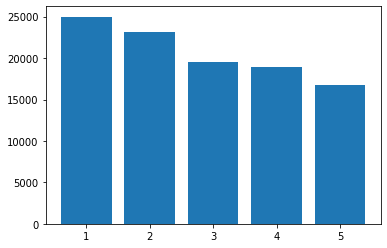

In [24]:
import matplotlib.pyplot as plt
g = a['department'].value_counts()[0:5]
plt.bar(x = range(1,6), height = g)

In [26]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
def barplot(df,column, title, top=5):
    g = df[column].value_counts()[0:top]
    plt.bar(x = range(1,top+1), height = g, tick_label = list(g.index)
)
    plt.xticks(rotation = 20)
    plt.ylabel('Frequency')
    plt.title(title)

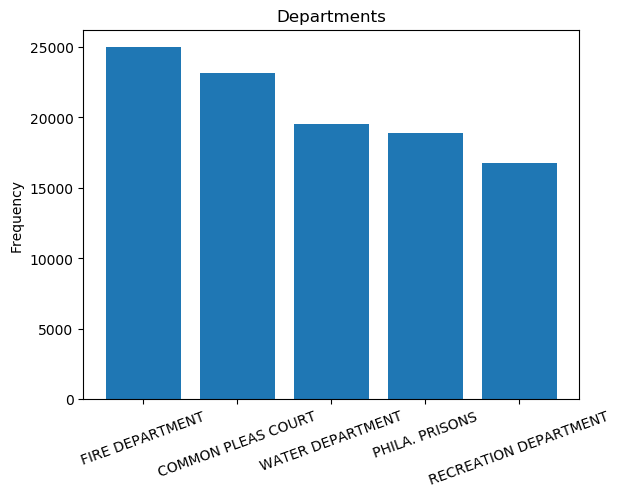

In [28]:
barplot(a, 'department','Departments',  )

__B8.__ _(5 pts)_ Here, we'll do the same thing but now for histograms and the numeric columns. In particular, write a function called `histogram(df, column, title)`, designed to take a `column` name from the dataframe `df` corresponding to a _numeric_ variable, like `'annual_salary'`. This function should create a histogram for the specified `column`. Make sure your graphs have the proper axis labels and `title` considering of the specified `column`.

When this is complete, exhibit your functions output on the various numeric columns in the dataset, but don't try and apply it to a categorical column!

In [30]:
import numpy as np
from matplotlib import pyplot as plt
def histogram(df, column, title):
    hist_fig = plt.figure(figsize = (6, 6))
    plt.hist(df[column])
    plt.tick_params(labelsize = 15)
    plt.title(title, fontsize = 15)
    plt.ylabel("Counts", fontsize = 15)
    plt.xlabel("Salary", fontsize = 15)


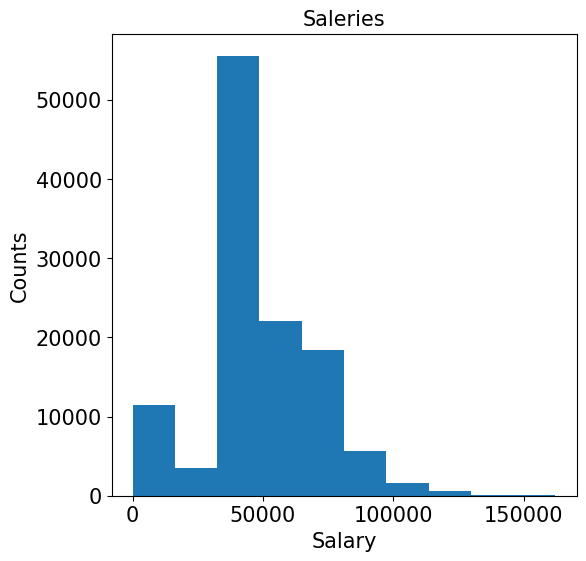

In [31]:
histogram(a,'annual_salary', 'Saleries')

__B9.__ _(2 pts)_ Next up, let's investigate the annual salaries column. Specifically, let's look at a boxplot of this column using `matplotlib.pyplot.plot.boxplot`, as in the Chapter 3 notes. When you apply this function to the salary column describe what you see for outliers in the response box below.

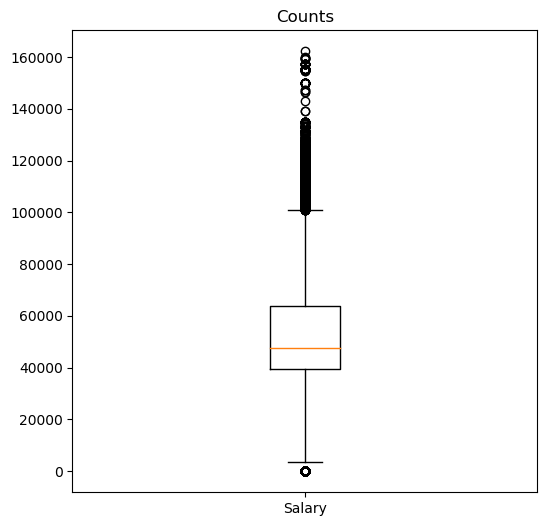

In [16]:
fig = plt.figure(figsize = (6, 6))


bp= plt.boxplot(a['annual_salary'], labels = ["Salary"])


bp = plt.title("Counts")

_Response._

In [17]:
#From the box and whisker plot above, we can see that the outliers on the high end range from the 100k to 140k range
#with the average being closer to the 50k range.

__B10.__ _(3 pts)_ Now that we can see the outliers, use the `np.percentile()` function and boolean masks to identify which employees have _high_ outlier salaries. Supposing $IQR$ refers to the size of the interquartile range of this column, utilize the boxplot visualization's criterion for 'outlier':

- Outlier: a point that falls $1.5$ times an $IQR$ distance _above_ the 3rd quartile.

When this is complete, use this boolean mask on our dataframe to print the `.head()` of our outlier employees and see what they do and earn.

In [18]:
import numpy as np
IQR = np.percentile(a["annual_salary"], [25, 75])
#df.head()
dist = IQR[1]-IQR[0]
1.5 * dist + IQR[1]
mask = a['annual_salary'] > (1.5 * dist + IQR[1])
a[mask]

,objectid,calendar_year,quarter,last_name,first_name,title,department,annual_salary,ytd_overtime_gross,gender
125,183,2016,1,BOZZACCO,GLENN,CHIEF COMPLIANCE OFFICER,COMMON PLEAS COURT,116860.0,0.0,male
140,198,2016,1,LASTER,JEREMIAH,DEPUTY COMMISSIONER,FIRE DEPARTMENT,132911.0,0.0,male
287,174,2016,1,UNGER,ROSEANNE,CHIEF 1,COMMON PLEAS COURT,104575.0,0.0,female
295,529,2016,1,TOUCHSTONE,MICHAEL,FIRE PARAMEDIC SERVICES CHIEF,FIRE DEPARTMENT,106654.0,0.0,male
369,602,2016,1,KATZ,DAVID,DEPUTY COMMISSIONER,WATER DEPARTMENT,127506.0,0.0,male
...,...,...,...,...,...,...,...,...,...,...
343651,436721,2018,1,FENERTY,MARGARET,DIRECTOR II,COMMON PLEAS COURT,102436.0,0.0,female
343736,436746,2018,1,FISHER,MARTHA,HUMAN RESOURCES ATTORNEY,COMMON PLEAS COURT,105913.0,0.0,female
343829,437874,2018,1,PUGLIESE,MARIA,DIRECTOR II,COMMON PLEAS COURT,102236.0,0.0,female
343937,437922,2018,1,RENDINE,DANIEL,JURY SELECTION COMMISSIONER,COMMON PLEAS COURT,116025.0,0.0,male


__B11.__ (5 pts) Now that we've got a sense of the outliers, let's see if we can up our visualization game. Both the boxplot and histogram provide different information on the structure of the distribution of salaries. It would be great if we could compare these! However, the best comparison will occur if the box is rotated and placed below the histogram so that the location of box, whiskers, etc. falls along (parallel to) the x-axis of the histogram.

In particular, use the `ax = fig.add_subplot(num_rows, num_cols, panel_number)` method on a figure object (the output of `plt.figure()`) to create different axes for the boxplot and histogram, taking care to label axes as needed. Don't forget that your boxplot should be displayed sideways and appear below the histogram!

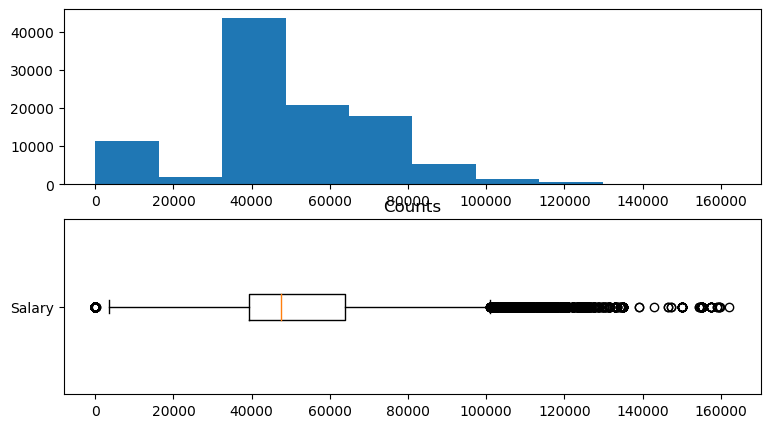

In [19]:
fig = plt.figure(figsize = (9, 5))
ax = fig.add_subplot(2, 1,1)
plt.hist(a['annual_salary'])
bp = fig.add_subplot(2,1,2)

bp= bp.boxplot(a['annual_salary'], labels = ["Salary"], vert = False)

bp = plt.title("Counts")

__B12.__ _(5 pts)_ Notice that while we know how much the employees earned in gross overtime, it's not entirely clear which individuals have actually _worked_ the most overtime hours. According to [a government guideline](https://www.opm.gov/policy-data-oversight/pay-leave/pay-administration/fact-sheets/computing-hourly-rates-of-pay-using-the-2087-hour-divisor/):

> Hourly rates of basic pay are computed by dividing an employee's annual rate of basic pay by 2087 hours.

So, using the assumption that overtime hours are payed out at $1.5$ times an employee's annual salary, compute the number of overtime hours worked by each employee in the dataset and store this in the dataframe under a new column called `'ytd_overtime_gross_hours'`. Be sure to handle remove any NAs or Infs from the result!

When this is complete, print the `.head(25)` of your resulting dataframe, sorted by this new column in descending order. In the response box below answer the following questions:

- Do you think is calculation is generally correct?
- What issues could occur with this overtime hours calculation?
- Do you think all employees are 'full time'?

\[Hint. Assuming these individuals _do_ work full time hours, how many overtime hours _could_ an individual _actually_ work in a year?\] 

_Response._

In [20]:
a.head()


,objectid,calendar_year,quarter,last_name,first_name,title,department,annual_salary,ytd_overtime_gross,gender
0,1,2016,1,CHILIBERTI,ROSEMARY,ADM TECHNICIAN III,COMMON PLEAS COURT,50543.0,0.0,female
4,5,2016,1,HILL,SEAN,PROBATION OFFICER 2,COMMON PLEAS COURT,56206.0,0.0,male
6,7,2016,1,SETTLES,LINDA,SENIOR COURT REPORTER,COMMON PLEAS COURT,66469.0,0.0,female
8,9,2016,1,BALL,JAMES,RECREATION LEADER 2,RECREATION DEPARTMENT,58126.0,0.0,male
9,10,2016,1,MANZONI,LOUIS,TIPSTAFF 1 (GENERAL),COMMON PLEAS COURT,44605.0,0.0,male


In [21]:
a['ytd_overtime_gross_hours'] = (a['ytd_overtime_gross'] * 2087) / (a['annual_salary'] * 1.5)

a['ytd_overtime_gross_hours'][a['ytd_overtime_gross'].isna() | a['ytd_overtime_gross_hours']==np.Inf] = 0
a['ytd_overtime_gross_hours'].replace(np.inf,0,inplace=True)
a.sort_values(by='ytd_overtime_gross_hours', ascending=False).head(25)

C:\Users\Beth\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Beth\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Beth\Anaconda3\lib\site-packages\pandas\core\generic.py:9114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.py

,objectid,calendar_year,quarter,last_name,first_name,title,department,annual_salary,ytd_overtime_gross,gender,ytd_overtime_gross_hours
256043,398122,2017,4,GREEN,MARK,SEWER MAINTENANCE INSPECTOR,WATER DEPARTMENT,3715.0,15373.20,male,5757.535828
202438,208323,2017,3,GREEN,MARK,SEWER MAINTENANCE INSPECTOR,WATER DEPARTMENT,3715.0,13442.91,male,5034.608016
330139,366856,2018,3,GREEN,MARK,SEWER MAINTENANCE INSPECTOR,WATER DEPARTMENT,3808.0,8884.70,male,3246.213043
277171,334402,2018,2,GREEN,MARK,SEWER MAINTENANCE INSPECTOR,WATER DEPARTMENT,3715.0,8438.10,male,3160.217981
242361,395664,2017,4,NEAL,SHARON,CORRECTIONAL OFFICER,PHILA. PRISONS,47196.0,97221.21,female,2866.071493
113170,114390,2016,4,GREEN,MARK,SEWER MAINTENANCE INSPECTOR,WATER DEPARTMENT,3607.0,7222.53,male,2785.956956
113697,111990,2016,4,NEAL,SHARON,CORRECTIONAL OFFICER,PHILA. PRISONS,47196.0,92005.08,female,2712.300505
324361,364546,2018,3,POTHEN,KENNY,CORRECTIONAL OFFICER,PHILA. PRISONS,7459.0,13522.89,male,2522.435664
245009,394503,2017,4,BYNUM,DONOVAN,CORRECTIONAL OFFICER,PHILA. PRISONS,47196.0,83196.27,male,2452.617672
242768,394804,2017,4,FELIX,BRUCE,CORRECTIONAL OFFICER,PHILA. PRISONS,47310.0,82181.65,male,2416.868929


In [ ]:
#Given the data above. We can see that while some female employees gain a high amount of overtime, the overwhelming
#majority of persons with high overtime rates are male. Additinally, although some of these employees seem to be
#part time (given the YTD Gross being significantly lower than other employees) 
#the overall majority are full time employees. 

__B13.__ _(5 pts)_ Our overall interest may be to understand the `'annual_salaries'` column, and one avenue towards understanding this variable is through exploration of relationships with the others. So here's one question we might ask:
        
- Do employees who work overtime have higher salaries? If so how much?

To approach this question, compute and print the correlation between these columns and display a scatter plot. Be sure to accomadate for density in the picture as you interpret. Again, label the axes clearly and provide a title for to support readers. 

When this is complete, discuss any relationship that you see (or don't) between the columns in the response box below.

_Response._ 

Text(0.5, 1.0, 'Employee Salaries')

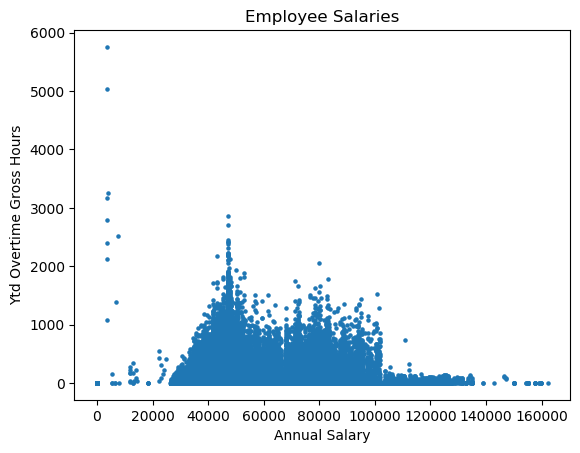

In [22]:
x = a['annual_salary']
y = a['ytd_overtime_gross_hours']
plt.scatter(x,y,s=5)
plt.xlabel('Annual Salary')
plt.ylabel('Ytd Overtime Gross Hours')
plt.title('Employee Salaries')

In [ ]:
#Response: From this chart, we can see the people who work the most overtime seem to make an average of 40-50k. 
#The outliers here, on the lower end, would agree with the chart above and represent part time workers. Those on the
#latter half of the chart would indicate those in CEO type positions and thus their overtime hours be much lower. 

__B14.__ _(5 pts)_ Now let's explore another hypothesis&mdash;that gender affects to pay. It will be good to  compare similarly-sized groups, so first group the rows by both `'gender'` and `'title'` to observe the gender ratios. 

In particular, use the `.groupby(column_list)` method to create generator of grouped rows. Using the `column_list = ['gender', 'title']` argument will allow extraction of two groups (one for each gender) with a matching `'title'`. Chose one of the top 10 `'title'`s (by greatest number of employees), but make sure there is a _reasonable balance_ of males and females for the profession you choose. Store these two resulting groups from as the `males` and `females` dataframes, print the `.head()` of each. In the response box below state the `'title'` that you chose.

_Response._ 

In [23]:
column_list = ['gender','title']
o = list(a.groupby(column_list))
#male = o.loc['male'].sort_values(by='department',ascending=False)
#female = o.loc['female'].sort_values(by='department',ascending=False)
#male.head(10)
#female.head(10)

In [24]:
from collections import defaultdict
d = defaultdict(dict)
for group in o:
    job_title= group[0][1]
    gender = group[0][0]
    count = group[1].shape[0]
    d[job_title][gender] = count
sorted(d,key = lambda x: sum(d[x].values()), reverse = True)[:10]


['FIREFIGHTER',
 'CORRECTIONAL OFFICER',
 'RECREATION SPECIALTY INSTRUCTOR',
 'FIRE LIEUTENANT',
 'PROBATION OFFICER 2',
 'FIRE SERV PARAMEDIC',
 'LEGAL CLERK 1',
 'EMERGENCY MEDICAL TECHNICIAN',
 'POOL MAINTENANCE ATTENDANT',
 'CORRECTIONAL SERGEANT']

In [25]:
d['CORRECTIONAL OFFICER']
for group in o:
    if group[0] == ('female', 'CORRECTIONAL OFFICER'):
         female_data_frame = group[1]
    elif group[0] == ('male', 'CORRECTIONAL OFFICER'):
        male_data_frame = group[1]

In [26]:
female_data_frame.head(5)


,objectid,calendar_year,quarter,last_name,first_name,title,department,annual_salary,ytd_overtime_gross,gender,ytd_overtime_gross_hours
6851,10255,2016,1,JONES,CHARON,CORRECTIONAL OFFICER,PHILA. PRISONS,40420.0,1744.89,female,60.062435
6949,8425,2016,1,HOLLINGSWORTH,LATANYA,CORRECTIONAL OFFICER,PHILA. PRISONS,41658.0,5376.59,female,179.572444
7025,9351,2016,1,MILLER,KATHERINE,CORRECTIONAL OFFICER,PHILA. PRISONS,46042.0,4702.67,female,142.108977
7067,10295,2016,1,GABAUD,SANDRA,CORRECTIONAL OFFICER,PHILA. PRISONS,45821.0,3668.93,female,111.405351
7094,10322,2016,1,JOHNSON,YOLANDA,CORRECTIONAL OFFICER,PHILA. PRISONS,40420.0,8146.82,female,280.429051


In [27]:
male_data_frame.head(5)

,objectid,calendar_year,quarter,last_name,first_name,title,department,annual_salary,ytd_overtime_gross,gender,ytd_overtime_gross_hours
6868,10272,2016,1,MILES,ANTONIO,CORRECTIONAL OFFICER,PHILA. PRISONS,45711.0,2194.46,male,66.794105
6952,8428,2016,1,LEE,CHARLES,CORRECTIONAL OFFICER,PHILA. PRISONS,46042.0,862.20,male,26.054637
6986,8462,2016,1,GEE,MARK,CORRECTIONAL OFFICER,PHILA. PRISONS,45711.0,6016.95,male,183.141544
7007,8483,2016,1,MONTGOMERY,DERRICK,CORRECTIONAL OFFICER,PHILA. PRISONS,46042.0,4430.94,male,133.897627
7055,9381,2016,1,HERNANDEZ,JOSEPH,CORRECTIONAL OFFICER,PHILA. PRISONS,40420.0,1761.84,male,60.645886


__B15.__ (2 pts) determine if there is a difference between your male and female salaries on average and discuss the severity of this difference in the response box.

_Response._

In [28]:
print(male_data_frame['annual_salary'].mean(), female_data_frame['annual_salary'].mean())


46337.55972534628 46609.88225047901


__B16.__ (3 pts) That's a lot of work still to compare two means, and there's a lot of different titles to compare. Grouping `'gender'` against a single other `'title'` is just a comparison of `'gender'` against a single `'title'` category, as opposed to the generalization of comparing `'gender'` across _all_ of the categories in the `'title'` column for the `'annual_salary'` value. It turns out, `pandas` has some very convenient utility for this with the `pd.crosstab()` function:

- ```pd.crosstab(x, y,  values=z, aggfunc = ['mean', 'std', 'count'])```

Here, `x` and `y` will be our two categorical columns to compare, while `z` will be the the numeric column along whose values we wish to observe effects (of the categories). 

Your job is to now apply the `pd.crosstab()` function to the `'title'` and `'gender'` columns (`x` and `y`) with `'annual_salary'` for `values`. The `aggfunc` argument specifies a list of metrics to apply as summary for the columns. For in this assignment, we're just going to use the mean and standard deviation and count (number of rows in the group).

After you run the `pd.crosstab()` function store the resulting dataframe as `avg_salary_gender_v_title`, and prinit/interpret the `.head(25)` in the response box below. Do you see an `'title'`s that you think are worth investigating?

_Response._ 

In [29]:
avg_salary_gender_v_title = pd.crosstab(a['title'], a['gender'],  values= a['annual_salary'], aggfunc = ['mean', 'std', 'count'])
avg_salary_gender_v_title.head(25)

C:\Users\Beth\Anaconda3\lib\site-packages\pandas\core\reshape\pivot.py:56: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return concat(pieces, keys=keys, axis=1)


mean                 \
gender                                           female           male   
ACCOUNT CLERK                              37072.130435   35416.800000   
ACCOUNTANT                                 50256.363636   54909.823529   
ACCOUNTING MANAGER                                  NaN   87309.090909   
ACCOUNTING SUPERVISOR                      57835.000000   67015.200000   
ACCOUNTING SUPVR                                    NaN   67324.571429   
ACCOUNTING TECHNICIAN 1                    37229.843750   36244.000000   
ACCOUNTING TECHNICIAN 2                    42811.022727   41479.333333   
ACCOUNTING TECHNICIAN 2 TF                 43749.250000   43465.545455   
ACCOUNTING TECHNICIAN III                  46517.642857            NaN   
ACCOUNTING TRANSACTIONS SUPERVISOR         73824.000000            NaN   
ACCTANT/REV EXAMINER/CONTRACT AUDIT TRAIN  39352.000000   39840.333333   
ACTING COMMISSIONER/PRISONS                         NaN  155000.000000   
ADM SECRETARY I                            40558.878049            NaN   
ADM SECRETARY II                           47561.218978   46731.000000   
ADM TECHNICIAN I                           37409.340426   36002.043478   
ADM TECHNICIAN II                          43004.388489   41145.111111   
ADM TECHNICIAN III                         49374.350000   49876.285714   
ADM TECHNICIAN IV                          63379.415094            NaN   
ADMIN ASST NON-CONFIDENTIAL                47972.700000   49715.636364   
ADMIN SPECIALIST 1 - NON-CONFIDENTIAL      46839.818182   43641.363636   
ADMIN SPECIALIST 2 NON-CONFIDENTIAL        60590.764706   53443.100000   
ADMIN SRVCS SUPERVISOR - CONFIDENTIAL      49839.642857            NaN   
ADMIN SRVS SUPERVISOR NON-CONFIDENTIAL     49540.254902   50605.090909   
ADMINISTRATIVE ASSISTANT - CONFIDENTIAL    50335.588235            NaN   
ADMINISTRATIVE OFFICER                     60270.457143            NaN   

                                                   std               count  \
gender                                          female         male female   
ACCOUNT CLERK                              1973.852049   679.293162  138.0   
ACCOUNTANT                                 4761.705402  8940.140503   22.0   
ACCOUNTING MANAGER                                 NaN   773.075087    NaN   
ACCOUNTING SUPERVISOR                      3286.000000  7251.929929    4.0   
ACCOUNTING SUPVR                                   NaN   998.065271    NaN   
ACCOUNTING TECHNICIAN 1                    1479.229052  1743.187119   32.0   
ACCOUNTING TECHNICIAN 2                     860.593778   847.267766   44.0   
ACCOUNTING TECHNICIAN 2 TF                 1892.709724  2122.085972   44.0   
ACCOUNTING TECHNICIAN III                   453.669417          NaN   14.0   
ACCOUNTING TRANSACTIONS SUPERVISOR         5575.411850          NaN   21.0   
ACCTANT/REV EXAMINER/CONTRACT AUDIT TRAIN   586.000000   605.218198    4.0   
ACTING COMMISSIONER/PRISONS                        NaN     0.000000    NaN   
ADM SECRETARY I                            2008.964599          NaN   41.0   
ADM SECRETARY II                           1088.545810  1365.198197  137.0   
ADM TECHNICIAN I                           1485.133900  1320.029864   94.0   
ADM TECHNICIAN II                          1259.922223  2007.029674  139.0   
ADM TECHNICIAN III                         2084.731821  2142.328293   20.0   
ADM TECHNICIAN IV                          1592.681308          NaN   53.0   
ADMIN ASST NON-CONFIDENTIAL                3141.851750  1398.633535   40.0   
ADMIN SPECIALIST 1 - NON-CONFIDENTIAL      2751.088142  7012.341353   11.0   
ADMIN SPECIALIST 2 NON-CONFIDENTIAL        4280.320181  6841.775307   85.0   
ADMIN SRVCS SUPERVISOR - CONFIDENTIAL      2884.282703          NaN   14.0   
ADMIN SRVS SUPERVISOR NON-CONFIDENTIAL     3053.556647  1748.496086   51.0   
ADMINISTRATIVE ASSISTANT - CONFIDENTIAL    1928.836611          NaN   34.0   
ADMINISTRATIVE OFFICER  

__B17.__ (3 pts) Finally, your job here is to explore the of the 25 `'title'`s with largest difference in average pay between genders using `avg_salary_gender_v_title` dataframe.

To start, drop any rows/`'title'`s for which there are NAs. Then, compute an additional columns called `'absolute_difference'`, containinig the absolute value of the differences between the male and female columns. Next, `.sort(ascending = False)` the modified `avg_salary_gender_v_title` dataframe by the new `'absolute_difference'` column and store the resultinig `.head(25)` as `top_25` and print the result.

When this is done, discuss in the response box below an observations about these most widely varying salaries averages? Does the standard deviation help to glean any other information?

_Response._

In [30]:
avg_salary_gender_v_title.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)
avg_salary_gender_v_title['absolute_difference'] = abs(avg_salary_gender_v_title['mean']['male'] - avg_salary_gender_v_title['mean']['female'])
avg_salary_gender_v_title.sort_values(by = 'absolute_difference',ascending = False).head(25)


mean                 \
gender                                          female           male   
LABOR,PROCUREMENT & LITIGATION ATTORNEY   74100.000000  116860.000000   
RECREATION ATTENDANT                      27083.000000    4708.411765   
SENIOR ACCOUNTANT                         75152.318182   54983.000000   
CLERICAL ASSISTANT                         5941.434783   22644.000000   
PARKS OPERATIONS DIRECTOR                 95136.818182  108890.363636   
GRADUATE INTERN                           34244.000000   21610.363636   
PARKS & RECREATION OPERATIONS MANAGER     82024.846154   72203.300000   
ARCHITECTURAL PROJECT COORD 1             43417.500000   52838.333333   
ACCOUNTING SUPERVISOR                     57835.000000   67015.200000   
ARCHITECTURAL PROJECT COORD 2             57203.666667   65783.400000   
PROGRAM COORDINATOR                           0.000000    7764.000000   
OLDER ADULT CENTER DIRECTOR               67943.361111   75384.909091   
ADMIN SPECIALIST 2 NON-CONFIDENTIAL       60590.764706   53443.100000   
DEPUTY COMMISSIONER                      124296.439394  131302.591837   
CASE INTERVIEWER                          33830.471545   40693.754098   
HUMAN RESOURCE PROFESSIONAL (CP10-19A)    55704.357143   48861.777778   
CHIEF 1                                  108466.851852  101818.437500   
WORK STUDY INTERN                         28319.548387   22323.706522   
ENVIRONMENTAL EDUCATION PLANNER           51506.437500   45552.272727   
HUMAN RESOURCES PROFESSIONAL 2            62340.000000   56457.696970   
DEPUTY PRISON COMMISSIONER               119469.363636  125123.285714   
UTILITY FINANCIAL SERVICES MANAGER        99599.428571  105195.000000   
COMMUNITY INITIATIVES SPECIALIST          47737.481481   53058.030303   
GEOGRAPHIC INFORMATION SYS SPECIALIST 3   79667.000000   74597.055556   
CHIEF 2                                  123040.000000  118034.406780   

                                                  std                count  \
gender                                         female          male female   
LABOR,PROCUREMENT & LITIGATION ATTORNEY      0.000000      0.000000    4.0   
RECREATION ATTENDANT                       763.917535  10484.368961   13.0   
SENIOR ACCOUNTANT                         2164.066023      0.000000   22.0   
CLERICAL ASSISTANT                       11532.677773  12658.380821   23.0   
PARKS OPERATIONS DIRECTOR                 4628.839440   2374.650386   11.0   
GRADUATE INTERN                              0.000000  17137.379370    9.0   
PARKS & RECREATION OPERATIONS MANAGER     1795.946308   7657.687906   13.0   
ARCHITECTURAL PROJECT COORD 1             1665.236470   5390.058379    2.0   
ACCOUNTING SUPERVISOR                     3286.000000   7251.929929    4.0   
ARCHITECTURAL PROJECT COORD 2             3325.777578   1622.043711    9.0   
PROGRAM COORDINATOR                          0.000000  15528.000000   10.0   
OLDER ADULT CENTER DIRECTOR               6471.150404   3062.251768   36.0   
ADMIN SPECIALIST 2 NON-CONFIDENTIAL       4280.320181   6841.775307   85.0   
DEPUTY COMMISSIONER                      17213.748466  16677.831899   66.0   
CASE INTERVIEWER                          1009.118877   8204.861446  123.0   
HUMAN RESOURCE PROFESSIONAL (CP10-19A)    7417.016076   8606.963272   14.0   
CHIEF 1                                   1705.541640   4910.122741   27.0   
WORK STUDY INTERN                          659.507583  11466.580444   62.0   
ENVIRONMENTAL EDUCATION PLANNER           5911.005114   3225.165270   16.0   
HUMAN RESOURCES PROFESSIONAL 2            4507.195913   5959.476741   13.0   
DEPUTY PRISON COMMISSIONER                9365.787466   3026.641740   11.0   
UTILITY FINANCIAL SERVICES MANAGER        5494.286987   2858.000000   14.0   
COMMUNITY INITIATIVES SPECIALIST          5832.649394   1153.361324   27.0   
GEOGRAPHIC INFORMATION SYS SPECIALIST 3   1547.149637   6020.932999    8.0   
CHIEF 2                                   5250.000

In [ ]:
#While the STD shows an average deviation between averages, the created column "absolute_difference" shows a much more
#accurate representation of information between males and females at simular job titles. 

__B18.__ _(2 pts)_ Finally, take your `top_25` largest-difference `'title'`s and display them using a side-by-side barplot. To conveniently do this, we can use the `.plot(kind = 'bar')` on our `['mean']` column in the `top_25` data frame. 

Use the dataframe `.plot()` method, since this `pandas` method for a barplot is really just wrapping `matplotlib`'s `pyplot`. This means we can use `pyplot`/`matpltlib` (proper) commands for many things like the `plt.title()`, but to make the figure size nice we have the pass the `figsize=(x_inches,y_inches)` argument to the dataframe `.plot()` method. So, as is necessary make this visualization look nice to ease your discussion (above)!

Text(0.5, 1.0, 'Top 25 un equal jobs')

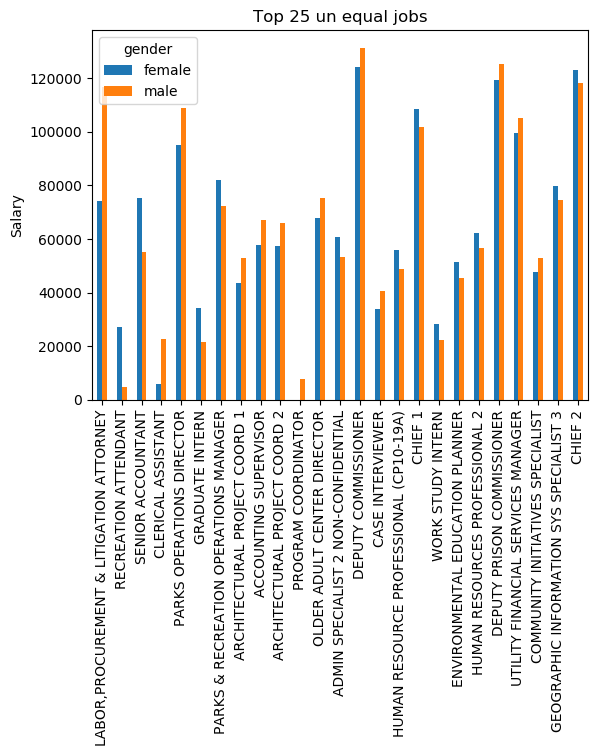

In [31]:
avg_salary_gender_v_title.sort_values(by = 'absolute_difference',ascending = False).head(25)['mean'].plot(kind = 'bar')
plt.ylabel('Salary')
plt.title('Top 25 un equal jobs')